# Autómatas Celulares

## Punto 1: Reglas básicas

#### Casa:
   
   * Si hay objetos fuera de su lugar habitual, ordenarlos
   
   * Si no hay trabajo pendiente, prender algún juego
   
   * Antes de salir, revisar que tengo llaves, celular y billetera
   
   ### Universidad:
   
   * Si hay disturbios en la 45, salir por la capilla
   
   * Si el profesor no llega en 30min, abandonar el salón
   
   * Si encuentro un amigo, detenerme a saludar
   
   #### Medio de Transporte (Transmilenio):
   
   * Si el bus está a más del 85% de su capacidad y no tengo prisa, esperar el siguiente
   
   * Si no recuerdo el saldo de la tarjeta, revisar antes de llegar al torniquete

## Punto 2: Modelo incendio forestal con python

El modelo de propagación de un incendio forestal basado en Autómatas Célulares Progabilísticos.

### Modelo:

#### Estado de las casillas:
- **EMPTY**: Sin vegetación. Se representará por casilla de color negro
- **TREE**: Vegetación sana. Se representará con casillas de colo verde
- **BURNING**: En llamas. Se representará con casillas de colo rojo
- **ASH**: Cenizas. Se representará con casillas de colo gris

#### Parámetros:
- **width**: Ancho de la matriz que representa el territorio
- **Height**: Alto de la matriz que representa el territorio
- **prob_spread**: Probabilidad de un árbol de incediarse si tiene un vecino que se encuentra en estado *BURNING*


In [ ]:
pip install matplotlib

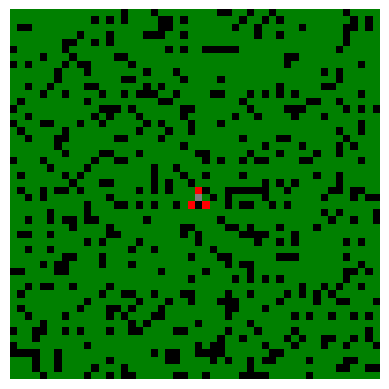

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Dimensiones de la cuadrícula
width, height = 50, 50
prob_spread = 0.4  # Probabilidad de propagación del fuego

# Estados de las celdas
EMPTY = 0      # Sin vegetación
TREE = 1       # Vegetación sana
BURNING = 2    # En llamas
ASH = 3        # Cenizas

# Inicialización de la cuadrícula
def initialize_grid():
    grid = np.random.choice([EMPTY, TREE], size=(height, width), p=[0.2, 0.8])
    # Inicia el fuego en un punto central
    grid[height // 2, width // 2] = BURNING
    return grid

# Función para actualizar la cuadrícula
def update_grid(grid):
    new_grid = grid.copy()
    for y in range(height):
        for x in range(width):
            if grid[y, x] == TREE:
                # Verifica vecinos para propagación del fuego
                neighbors = grid[max(0, y-1):min(height, y+2), max(0, x-1):min(width, x+2)]
                if BURNING in neighbors and np.random.random() < prob_spread:
                    new_grid[y, x] = BURNING
            elif grid[y, x] == BURNING:
                new_grid[y, x] = ASH  # Celda se convierte en cenizas
    return new_grid

# Configuración para la visualización
def animate(i):
    global grid
    im.set_array(grid)
    grid = update_grid(grid)
    return [im]

# Colores para los estados
colors = ['black', 'green', 'red', 'gray']
cmap = plt.cm.colors.ListedColormap(colors)
bounds = [0, 1, 2, 3, 4]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Inicialización del gráfico
grid = initialize_grid()
fig, ax = plt.subplots()
im = ax.imshow(grid, cmap=cmap, norm=norm)
ax.axis('off')

# Animación
ani = animation.FuncAnimation(fig, animate, frames=100, interval=1000, blit=True)
plt.show()


**Nota:** Debido a que es posible que el Jupyter NoteBook no presente de forma correcta el modelo, se encuentra adjunto el código en archivo python


## Punto 3: Voronoi

El mapa corresponde a los colegios de la localidad de Suba, al cual se le va aplicar el diagrama de Voronoi

In [ ]:
pip install scipy

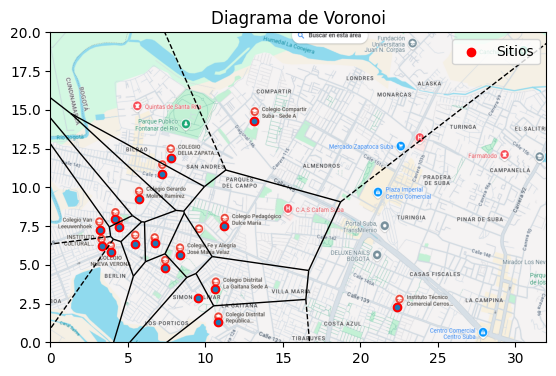

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.image as mpimg

# Cargar la imagen de fondo
background = mpimg.imread('imagen.png') 

# Paso 1: Generar puntos aleatorios (sitios)
np.random.seed(42)  # Para reproducibilidad
num_points = 10
points = np.array([[10.78,1.28],[22.34,2.29],[10.63,3.45],[7.39,4.76],    [3.92,5.80],[3.31,6.23],[5.47,6.36],[8.34,5.63],    [6.73,6.39],[3.18,7.26],[4.45,7.42],[9.55,2.86],   [4.18,7.97],[11.21,7.47],[5.68,9.23],[7.18,10.86],  [7.76,11.92],[13.10,14.29]])
# Paso 2: Calcular el diagrama de Voronoi
vor = Voronoi(points)

# Paso 3: Visualizar el diagrama de Voronoi
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False)  # Mostrar sin los vértices

# Mostrar la imagen de fondo
ax.imshow(background, extent=[0, 32, 0, 20])  # Ajusta `extent` al rango de datos de tu gráfico

# Agregar los puntos generadores
ax.scatter(points[:, 0], points[:, 1], color='red', label='Sitios')

ax.set_title("Diagrama de Voronoi")
# Configurar el eje
ax.set_xlim(0, 32)
ax.set_ylim(0, 20)
ax.legend()
plt.show()